In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
graph_size = (13,6)

import python.display as dp
import python.data as data
import python.voxels as voxel

project_folder = "veleval"


In [2]:
data.add_time_elapsed("files/"+project_folder+"_wtime/data_processed/observations.df", 0)

In [3]:
data.simplify_gps("files/"+project_folder+"_wtime/data_processed/observations.df", 
                  "files/"+project_folder+"_wtime/data_processed/observations_simplified.df", 0, dim=3)

In [4]:
data.add_speed("files/"+project_folder+"_wtime/data_processed/observations_simplified.df")

In [40]:
with open("files/"+project_folder+"_wtime/data_processed/observations_simplified.df",'rb') as infile:
    df_simplified = pickle.load(infile)
tab_routes_voxels_simplified, tab_routes_voxels_simplified_global, dict_voxels_simplified = voxel.generate_voxels(
    df_simplified, df_simplified.iloc[0]["route_num"], df_simplified.iloc[-1]["route_num"])

In [ ]:
with open("files/"+project_folder+"_wtime/data_processed/observations.df",'rb') as infile:
    df = pickle.load(infile)

In [41]:
df_simplified = df_simplified[df_simplified["speed"]>0]

In [38]:
df_simplified = df_simplified[["lat", "lon", "time", "route_num", "time_elapsed"]]

792


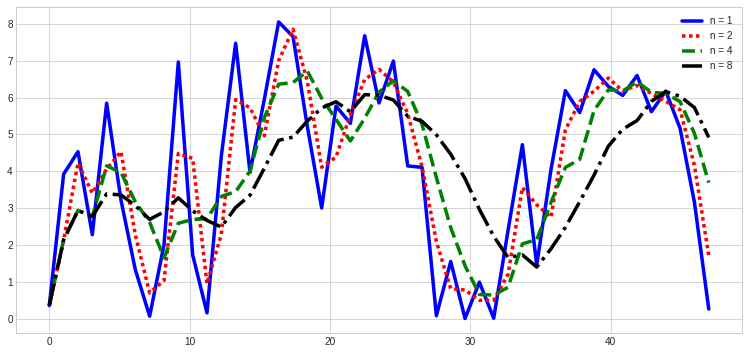

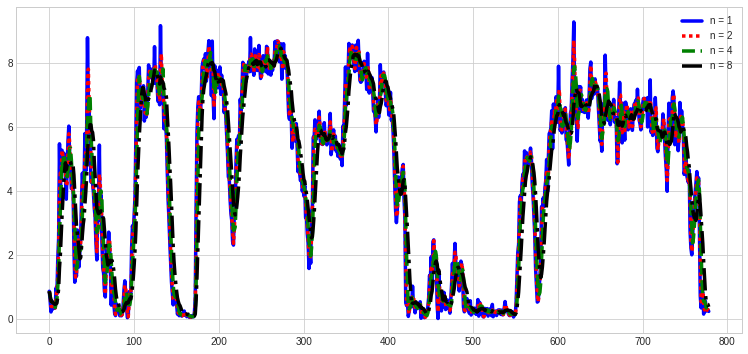

In [95]:
num_route = 150
nb_graph=3

df_temp = df_simplified[df_simplified["route_num"]==num_route]
fig = plt.figure(figsize=graph_size)
ax = plt.axes()
x = np.linspace(0, len(df_temp), len(df_temp))
tab_avg_speed = data.compute_average_speed(df_temp, 1)
plt.plot(x, tab_avg_speed, color='blue', linewidth=3.5, label='n = 1')
tab_avg_speed = data.compute_average_speed(df_temp, 2)
plt.plot(x, tab_avg_speed, color='red', linestyle=(0,(1,1)), linewidth=3.5, label='n = 2')
tab_avg_speed = data.compute_average_speed(df_temp, 4)
plt.plot(x, tab_avg_speed, color='green', linestyle='dashed', linewidth=3.5, label='n = 4')
tab_avg_speed = data.compute_average_speed(df_temp, 8)
plt.plot(x, tab_avg_speed, color='black', linestyle='dashdot', linewidth=3.5, label='n = 8')
plt.legend(loc='upper right')
plt.savefig('images/graph_'+str(nb_graph)+'_simplified.png')

df_temp = df[df["route_num"]==num_route]
tab_speed = data.compute_speed(df_temp)
df_temp.insert(loc=2, column='speed', value=tab_speed)
df_temp = df_temp[df_temp["speed"]>0]
fig = plt.figure(figsize=graph_size)
ax = plt.axes()
x = np.linspace(0, len(df_temp), len(df_temp))
tab_avg_speed = data.compute_average_speed(df_temp, 1)
plt.plot(x, tab_avg_speed, color='blue', linewidth=3.5, label='n = 1')
tab_avg_speed = data.compute_average_speed(df_temp, 2)
plt.plot(x, tab_avg_speed, color='red', linestyle=(0,(1,1)), linewidth=3.5, label='n = 2')
tab_avg_speed = data.compute_average_speed(df_temp, 4)
plt.plot(x, tab_avg_speed, color='green', linestyle='dashed', linewidth=3.5, label='n = 4')
tab_avg_speed = data.compute_average_speed(df_temp, 8)
plt.plot(x, tab_avg_speed, color='black', linestyle='dashdot', linewidth=3.5, label='n = 8')
plt.legend(loc='upper right')
plt.savefig('images/graph_'+str(nb_graph)+'.png')

In [69]:
df_temp = df[df["route_num"]==num_route]
tab_speed = data.compute_speed(df_temp)
df_temp.insert(loc=2, column='speed', value=tab_speed)
df_temp = df_temp[df_temp["speed"]>0]
tab_avg_speed = data.compute_average_speed(df_temp, 1)

440
